In [131]:
import sklearn

In [132]:
sklearn.__version__

'1.0.2'



```
# 코드로 형식 지정됨
```

#1. Linear Regression

### 공부 시간에 따른 시험 점수

In [133]:
import matplotlib.pyplot as plt
import pandas as pd

In [134]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [135]:
dataset.head() #hour : 독립변수(원인), score: 종속변수(결과)

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [136]:
X = dataset.iloc[:,:-1].values #row, columnc 처음부터 마지막 컬럼 직전까지의 데이터 (독립 변수)
y = dataset.iloc[:,-1].values

In [137]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [138]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # fit은 학습, 모델 생성

LinearRegression()

In [139]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

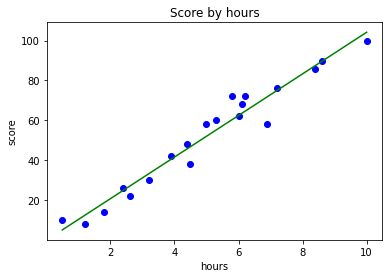

In [140]:
plt.scatter(X, y, color = 'blue') #산점도 표현
plt.plot(X, y_pred, color = 'green') #선 그래프 (예측 값 표시)
plt.title("Score by hours") #제목 
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [141]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]])) #X가 2차원 데이터였음.  [[9],[8],[7]]

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [142]:
reg.coef_ #기울기 (m)

array([10.44369694])

In [143]:
reg.intercept_ #y 절편 (b)

-0.218484702867201

###데이터 세트 분리


In [144]:
import matplotlib.pyplot as plt
import pandas as pd

In [145]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [146]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [147]:
from sklearn.model_selection import train_test_split #train set과 test set 구분

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #20퍼센트를 test set으로 설정, random적으로 고를지 아닐지 설정 (실전에서 필요없음)

In [149]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]), 20)

In [150]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]), 16)

In [151]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]), 4)

In [152]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]), 20)

In [153]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [154]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

### 분리된 데이터를 통한 모델링

In [155]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [156]:
reg.fit(X_train, y_train) #훈련 세트로 학습

LinearRegression()

###데이터 시각화 (훈련 세트)

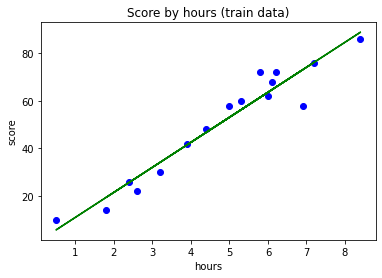

In [157]:
plt.scatter(X_train, y_train, color = 'blue') #산점도 표현
plt.plot(X_train, reg.predict(X_train), color = 'green') #선 그래프 (예측 값 표시)
plt.title("Score by hours (train data)") #제목 
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

###데이터 시각화 (테스트 세트)

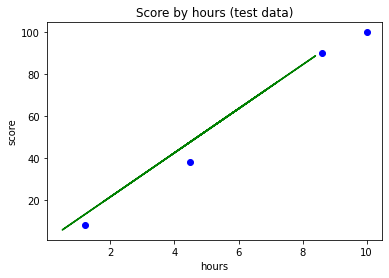

In [158]:
plt.scatter(X_test, y_test, color = 'blue') #산점도 표현
plt.plot(X_train, reg.predict(X_train), color = 'green') #선 그래프 (예측 값 표시)
plt.title("Score by hours (test data)") #제목 
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [159]:
reg.coef_ 

array([10.49161294])

In [160]:
reg.intercept_

0.6115562905169369

### 모델 평가 

In [161]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [162]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668

# 경사 하강법 (Gradient Descent)

max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)

eta0 : 학습률 (running rate)


In [163]:
from sklearn.linear_model import SGDRegressor # SGD : stochastic Gradient Descent 확률적 경사 하강법

# 지수 표기법 
# 1e-3 : 0.001 (10^-3)
# 1e-4 : 0.0001 (10^-4)
# 1e+3 : 1000 (10^3)

sr = SGDRegressor(max_iter = 1000, eta0 = 1e-4,random_state = 0, verbose = 1) 
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

SGDRegressor(eta0=0.0001, random_state=0, verbose=1)

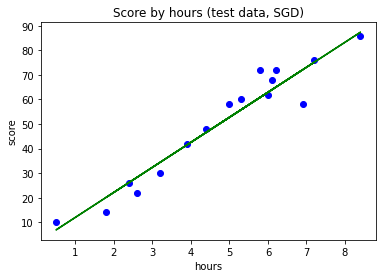

In [164]:
plt.scatter(X_train, y_train, color = 'blue') #산점도 표현
plt.plot(X_train, sr.predict(X_train), color = 'green') #선 그래프 (예측 값 표시)
plt.title("Score by hours (test data, SGD)") #제목 
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [165]:
sr.coef_, sr.intercept_

(array([10.19197471]), array([1.77603038]))

In [166]:
sr.score(X_test, y_test)

0.9748430825252619

In [167]:
sr.score(X_train, y_train)

0.9347804758954794